
本章主要内容为数据读取和数据分析，具体使用Pandas库完成数据读取操作，并对赛题数据进行分析构成。

此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：
- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train_set/train_set.csv', sep='\t', nrows=100)

### 句子长度分析

In [3]:
train_df['text_len']= train_df['text'].apply(lambda x : len(x.split(' ')))

In [4]:
print(train_df['text_len'].describe())

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

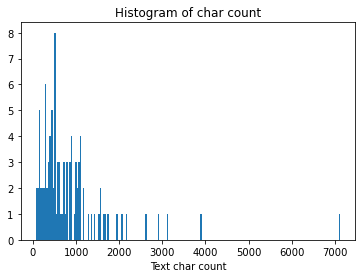

In [7]:
import matplotlib.pyplot as plt

_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

### 新闻类别分析

Text(0.5, 0, 'category')

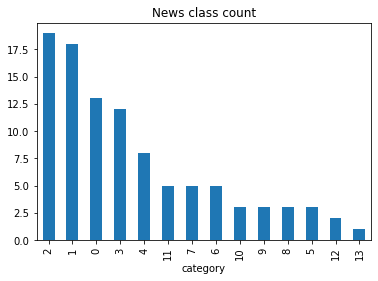

In [8]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

### 字符分布统计

将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数

In [12]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
print(len(word_count))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

2405
2405
('3750', 3702)
('5034', 1)


根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [13]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
print(len(word_count))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[1])

print(word_count[2])

2405
2405
('3750', 99)
('900', 99)
('648', 96)


### 数据分析的结论

通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；
通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度；